## Hometask #4 

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Задание 1

In [134]:
# Загрузим датасет
data = pd.read_stata('boston.zip', index_col=None)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [135]:
# Разделим данные на таргет и признаки

X = data.drop('medv', axis=1).copy()
y = pd.Series(data['medv'], name='price')

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
# Разделим на выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape

((404, 13), (102, 13), (404,))

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
# Отмасштабируем данные

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [140]:
from sklearn.manifold import TSNE

In [141]:
# Понизим размерность до 2-х признаков и зададим плоность 250

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_scaled.shape, X_train_tsne.shape

((404, 13), (404, 2))

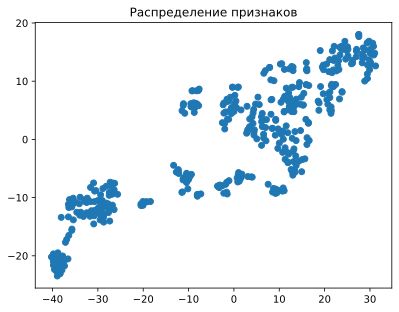

In [142]:
# посмотрим распределение на графике

plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1],)
plt.title('Распределение признаков');

## Задание 2 

Сделаем кластеризацию выборки по полученным 2-м признакам с помощью K-Means

In [143]:
from sklearn.cluster import KMeans

In [144]:
# Разбиение на 3 кластера
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

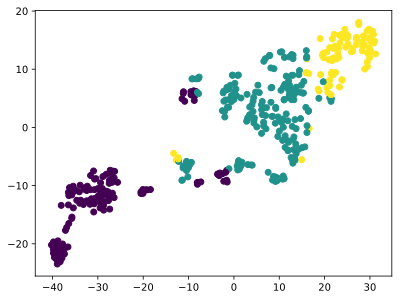

In [145]:
# визуализируем кластеры на графике
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train);

* Узнаем средние показатели по `цене` и `криминальности`, crim, в разбивке по кластерам по  _тренировочной выборке_

In [146]:
for i in range(3):
    print(f'Средняя цена по кластерy {i+1} составляет {np.round(y_train[labels_train == i].mean(),2)}')

Средняя цена по кластерy 1 составляет 16.17
Средняя цена по кластерy 2 составляет 24.96
Средняя цена по кластерy 3 составляет 27.79


In [147]:
for i in range(3):
    print(f'Средний размер признака crim, криминальность по кластеру {i+1} составляет', np.round(X_train.loc[(labels_train == i), 'crim'].mean(), 2))

Средний размер признака crim, криминальность по кластеру 1 составляет 10.8
Средний размер признака crim, криминальность по кластеру 2 составляет 0.42
Средний размер признака crim, криминальность по кластеру 3 составляет 0.07


## Задание 3
посмотрим разбиение на _тестовой выборке_  и также посмотрим средние показатели по кластерам

In [148]:
labels_test = kmeans.predict(X_test_scaled)
labels_test[:10]

array([1, 2, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int32)

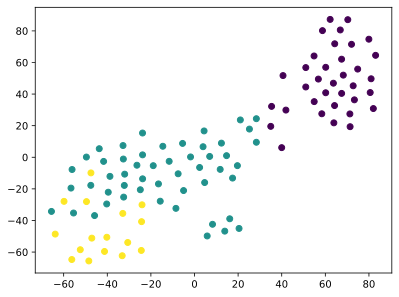

In [149]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c=labels_test);

In [150]:
for i in range(3):
    print(f'Средняя цена по кластерy {i+1} составляет {np.round(y_test[labels_test == i].mean(),2)}')

Средняя цена по кластерy 1 составляет 16.44
Средняя цена по кластерy 2 составляет 21.86
Средняя цена по кластерy 3 составляет 31.35


In [151]:
for i in range(3):
    print(f'Средний размер признака crim, криминальность по кластеру {i+1} составляет', np.round(X_test.loc[(labels_test == i), 'crim'].mean(), 2))

Средний размер признака crim, криминальность по кластеру 1 составляет 10.17
Средний размер признака crim, криминальность по кластеру 2 составляет 0.27
Средний размер признака crim, криминальность по кластеру 3 составляет 0.06


`Вывод`
- средние показатели по кластерам по тренировочной и тестовой выборке очень близки, практически идентичны, 
- а также, существенное различие в признаках соответствует хараткеру выборки, кластер с низкими средними ценами соответствует высокому уровню криминальности и наоборот